In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
#read data
df = pd.read_csv("ex1data2.txt", header=None, delim_whitespace=True)

In [6]:
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

In [10]:
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, alpha, n_epoch):
    list_mse = []
    coef = [0.0 for i in range(len(train[:-1]))]
    for epoch in range(n_epoch):
        sum_error = 0
        np.random.shuffle(train)
        for row in train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            sum_error += error**2
            coef[0] = coef[0] + alpha * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + alpha * error * row[i]
        print('>epoch=%d, alpha=%.3f, error=%.3f' % (epoch, alpha, sum_error/len(train[:-1])))
        list_mse.append(sum_error/len(train[:-1]))
    return list_mse, coef

In [14]:
list_mse, coef = coefficients_sgd(df.values, 0.01, 100)

>epoch=0, alpha=0.010, error=1.913
>epoch=1, alpha=0.010, error=0.761
>epoch=2, alpha=0.010, error=0.707
>epoch=3, alpha=0.010, error=0.659
>epoch=4, alpha=0.010, error=0.629
>epoch=5, alpha=0.010, error=0.576
>epoch=6, alpha=0.010, error=0.578
>epoch=7, alpha=0.010, error=0.541
>epoch=8, alpha=0.010, error=0.533
>epoch=9, alpha=0.010, error=0.523
>epoch=10, alpha=0.010, error=0.528
>epoch=11, alpha=0.010, error=0.509
>epoch=12, alpha=0.010, error=0.519
>epoch=13, alpha=0.010, error=0.506
>epoch=14, alpha=0.010, error=0.504
>epoch=15, alpha=0.010, error=0.503
>epoch=16, alpha=0.010, error=0.509
>epoch=17, alpha=0.010, error=0.501
>epoch=18, alpha=0.010, error=0.498
>epoch=19, alpha=0.010, error=0.489
>epoch=20, alpha=0.010, error=0.487
>epoch=21, alpha=0.010, error=0.487
>epoch=22, alpha=0.010, error=0.485
>epoch=23, alpha=0.010, error=0.462
>epoch=24, alpha=0.010, error=0.467
>epoch=25, alpha=0.010, error=0.454
>epoch=26, alpha=0.010, error=0.426
>epoch=27, alpha=0.010, error=0.467
>e

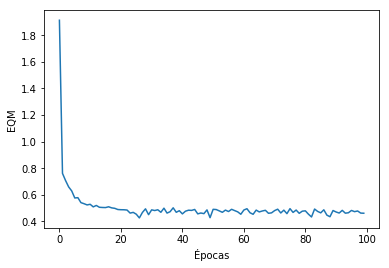

In [15]:
plt.plot(np.arange(len(list_mse)), list_mse)
plt.xlabel("Épocas")
plt.ylabel("EQM")
plt.show()